In [1]:
import pandas as pd
import json

In [ ]:
# JSONL dosyasını okuma
# Her satır ayrı bir JSON nesnesidir, bu yüzden her satırı ayrı ayrı yüklüyoruz
with open(r"Dataset/All_Beauty.jsonl", "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]


In [3]:
# JSON verisini DataFrame’e dönüştürme
df = pd.DataFrame(data)

In [4]:
#boyutu kontrol et
df.shape

(701528, 10)

In [ ]:
# DataFrame’i CSV dosyası olarak kaydetme
# "utf-8-sig" kodlaması Türkçe karakter sorunlarını önler
df.to_csv("outputs/All_Beauty.csv", index=False, encoding="utf-8-sig")

print("Dosya başarıyla CSV olarak kaydedildi.")
df.head()



Dosya başarıyla CSV olarak kaydedildi.


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [ ]:
# JSONL dosyasını okuma (ürün bilgileri)
# Her satır bir ürün nesnesidir
with open(r"Dataset/meta_All_Beauty.jsonl", "r", encoding="utf-8") as f:
    meta_data = [json.loads(line) for line in f]

In [7]:
# JSON verisini DataFrame'e dönüştürme
meta_df = pd.DataFrame(meta_data)

In [8]:
#boyutu kontrol et
meta_df.shape

(112590, 14)

In [ ]:
# DataFrame'i CSV dosyası olarak kaydetme
meta_df.to_csv("outputs/meta_All_Beauty.csv", index=False, encoding="utf-8-sig")

In [10]:
print("meta_All_Beauty dosyası başarıyla CSV'ye dönüştürüldü.")
meta_df.head()

meta_All_Beauty dosyası başarıyla CSV'ye dönüştürüldü.


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,None


In this step, we convert a JSONL file into a CSV file to make the data easier to read and process with pandas.

Each line in a JSONL file is a separate JSON object. Converting it to CSV creates a structured table format that can be used for cleaning and analysis.

Bu adımda JSONL dosyasını CSV’ye dönüştürüyoruz.

JSONL formatında her satır ayrı bir JSON nesnesidir.

CSV formatına dönüştürmek, verilerin tablo şeklinde düzenlenmesini sağlar ve veri temizleme ile analiz işlemlerini kolaylaştırır.

In [11]:
# Boş (eksik) değerleri içeren satırları kaldır
need = [c for c in ['user_id','asin','rating','timestamp','text'] if c in df.columns]
df = df.dropna(subset=need)


In [12]:
#boyutu kontrol et
df.shape

(701528, 10)

his happens because the drop_duplicates() function cannot directly compare values of type list.

Therefore, all list-type values are first converted to string format.

This conversion allows the function to safely compare and remove duplicate rows without causing errors.

drop_duplicates() fonksiyonunun list türündeki verileri doğrudan karşılaştıramamasından kaynaklanır.

Bu yüzden önce tüm list değerlerini string formatına dönüştürürüz.

Böylece fonksiyon satırları güvenli bir şekilde kıyaslayabilir ve yinelenen verileri kaldırabilir.

In [13]:
# List veya dict türündeki verileri karşılaştırmadan önce JSON formatına çeviriyoruz
def _to_json_if(v):
    return json.dumps(v, ensure_ascii=False) if isinstance(v, (list, dict)) else v

for c in df.columns:
    # Eğer sütunda list veya dict türü veri varsa, hepsini JSON string'e dönüştür
    if df[c].map(lambda v: isinstance(v, (list, dict))).any():
        df[c] = df[c].map(_to_json_if)

# Yinelenen (aynı) satırları kaldırıyoruz
# Eğer varsa user_id, asin ve timestamp sütunlarını birlikte kontrol et
subset_keys = [k for k in ['user_id', 'asin', 'timestamp'] if k in df.columns]
df.drop_duplicates(subset=subset_keys or None, inplace=True, ignore_index=True)


In [14]:
# Temizleme sonrası boyutu kontrol et
df.shape

(694252, 10)

In this step, we remove all rows that contain missing (NaN) or duplicate values.
This ensures that the dataset used for analysis and training is clean, consistent, and reliable.

Bu adımda eksik (NaN) veya yinelenen (duplicate) değerlere sahip satırları kaldırıyoruz.
Bu işlem, analiz ve model eğitimi için kullanılan verilerin temiz, tutarlı ve güvenilir olmasını sağlar.

In [15]:
# Gereksiz sütunları kaldırıyoruz
df.drop(columns=['images', 'parent_asin'], inplace=True)


In [16]:
print("All_Beauty dosyası başarıyla CSV'ye dönüştürüldü.")
df.head()

All_Beauty dosyası başarıyla CSV'ye dönüştürüldü.


,rating,title,text,asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",B07PNNCSP9,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In this step, we remove unnecessary columns that do not contribute to model training or analysis.
This reduces dataset size and improves efficiency.

Bu adımda, model eğitimine veya analize katkısı olmayan gereksiz sütunları kaldırıyoruz.
Bu, veri kümesinin boyutunu küçültür ve işlem verimliliğini artırır.

In [17]:
# Sadece gerekli sütunları seç
keep = [
    "asin", "parent_asin", "title", "main_category",
    "average_rating", "price", "store", "timestamp"
]
meta_df = meta_df.loc[:, [c for c in keep if c in meta_df.columns]]

In [18]:
# Sütun adlarını düzenle
meta_df = meta_df.rename(columns={
    "parent_asin": "asin",
    "title": "product_title"
})

In [19]:
# Eksik ana bilgileri sil
meta_df = meta_df.dropna(subset=["asin", "product_title"])


In [20]:
# Tekrarlanan ürünleri kaldır
meta_df = meta_df.drop_duplicates(subset=["asin"], keep="first")

In [21]:
# Boş alanları doldur
for c in ["product_title","main_category","price","store"]:
    if c in meta_df.columns:
        meta_df[c] = meta_df[c].fillna("Unknown")


In [22]:
print("Temiz meta boyutu:", meta_df.shape)
meta_df.head()

Temiz meta boyutu: (112590, 6)


,asin,product_title,main_category,average_rating,price,store
0,B01CUPMQZE,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",All Beauty,4.8,Unknown,Howard Products
1,B076WQZGPM,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,All Beauty,4.5,Unknown,Yes To
2,B000B658RI,Eye Patch Black Adult with Tie Band (6 Per Pack),All Beauty,4.4,Unknown,Levine Health Products
3,B088FKY3VD,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",All Beauty,3.1,Unknown,Cherioll
4,B07NGFDN6G,Precision Plunger Bars for Cartridge Grips – 9...,All Beauty,4.3,Unknown,Precision


Removing unnecessary columns:
The dataset may contain many columns, but we only need “parent_asin”, “title”, “main_category”, “average_rating”, “price”, and “store”.
Removing irrelevant data reduces memory usage and processing time.

Renaming columns:
The “parent_asin” column is renamed to match the “asin” column in the reviews file.
This makes it easier to merge the two datasets later.

Removing missing key information:
Rows with empty product IDs (“asin”) or product names (“product_title”) are useless.
Keeping them can harm model training, so they are completely removed.

Eliminating duplicate records:
If the same “asin” value appears more than once, only the first instance is kept.
This prevents redundancy and ensures consistent analysis.

Filling empty cells:
Some columns (like “price” or “store”) may have missing values.
Filling these cells with “Unknown” prevents errors caused by missing data.

As a result, the dataset becomes clean, balanced, and ready for analysis or model training.

Gereksiz sütunları kaldırmak:  
Veri dosyasında birçok sütun olabilir. Biz yalnızca "parent_asin", "title", "main_category", "average_rating", "price", ve "store" sütunlarına ihtiyaç duyuyoruz.  
Böylece gereksiz verileri atarak bellek kullanımını ve işlem süresini azaltırız.

Sütun adlarını düzenlemek:  
"parent_asin" sütunu, inceleme dosyasındaki "asin" sütunu ile eşleşmesi için yeniden adlandırılır.  
Bu, iki veri kümesini daha sonra birleştirmeyi (merge) kolaylaştırır.

Eksik ana bilgileri silmek:  
Ürün kimliği ("asin") veya ürün adı ("product_title") boş olan satırlar işe yaramaz.  
Bu satırların kalması modelin öğrenmesini bozabilir, bu yüzden tamamen silinir.

Tekrarlanan kayıtları kaldırmak:  
Aynı "asin" değeri birden fazla defa geçiyorsa, sadece ilkini bırakıyoruz.  
Bu, veri tekrarı (redundancy) sorununu önler ve analizleri tutarlı hale getirir.

Boş hücreleri doldurmak:  
Bazı sütunlarda ("price", "store" gibi) değer eksik olabilir.  
Bu hücreleri ""Unknown"" ile doldurmak, boş veri nedeniyle hata alınmasını engeller.

Sonuç olarak, veri kümesi artık temiz, dengeli ve analiz veya model eğitimi için hazır hale gelir.

In [23]:
# meta_df ve df veri kümelerini 'asin' sütunu üzerinden birleştiriyoruz
merged_df = pd.merge(df, meta_df, on="asin", how="inner")

print("Birleştirilmiş veri boyutu:", merged_df.shape)
merged_df.head()

Birleştirilmiş veri boyutu: (633693, 13)


,rating,title,text,asin,user_id,timestamp,helpful_vote,verified_purchase,product_title,main_category,average_rating,price,store
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,Herbivore - Natural Sea Mist Texturizing Salt ...,All Beauty,4.3,Unknown,HERBIVORE
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,All Natural Vegan Dry Shampoo Powder - Eco Fri...,All Beauty,4.0,Unknown,Two Goats Apothecary
2,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,muaowig Ombre Body Wave Bundles 1B Grey Human ...,All Beauty,1.0,Unknown,muaowig
3,5.0,A+,Love it,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,Yinhua Electric Nail Drill Kit Portable Profes...,All Beauty,3.5,Unknown,Yinhua
4,4.0,Pretty Color,The polish was quiet thick and did not apply s...,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1598567408138,0,True,"China Glaze Nail Polish, Wanderlust 1381",All Beauty,3.8,7.1,China Glaze


Merging Datasets (Merging DataFrames)

In this step, we combine product information and user reviews into a single table.
The merge is performed using the common column “asin” that exists in both datasets.

Purpose: To add product details such as title, category, and price to each user review.
Method: The pd.merge() function is used.
Parameters:

on="asin"  specifies the common column used for merging.

how="inner"  keeps only rows where the “asin” value exists in both datasets.

Result: A clean and enriched single dataset is obtained.

Veri Kümelerini Birleştirme (Merging DataFrames)

Bu adımda ürün bilgilerini ve kullanıcı yorumlarını tek bir tabloya getiriyoruz.  
İki veri kümesinde ortak sütun olan "asin" üzerinden birleştirme (merge) yapılır.

Amaç: Her kullanıcı yorumuna, ilgili ürünün başlığı, kategorisi ve fiyatı gibi bilgileri eklemek.
Yöntem: "pd.merge()" fonksiyonu kullanılır.
Parametreler:
  on="asin"  iki tabloyu birleştirmek için ortak sütun.
  how="inner"  yalnızca her iki tabloda da ortak olan "asin" değerleri alınır.
Sonuç:Temizlenmiş ve zenginleştirilmiş tek bir veri kümesi elde edilir.

In [24]:
# Veri kümesinin genel yapısını görüntüleme
# Hangi sütunların bulunduğunu, veri türlerini ve eksik değer sayısını gösterir
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633693 entries, 0 to 633692
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             633693 non-null  float64
 1   title              633693 non-null  object 
 2   text               633693 non-null  object 
 3   asin               633693 non-null  object 
 4   user_id            633693 non-null  object 
 5   timestamp          633693 non-null  int64  
 6   helpful_vote       633693 non-null  int64  
 7   verified_purchase  633693 non-null  bool   
 8   product_title      633693 non-null  object 
 9   main_category      633693 non-null  object 
 10  average_rating     633693 non-null  float64
 11  price              633693 non-null  object 
 12  store              633693 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 58.6+ MB


In [25]:
# Sayısal sütunların temel istatistiksel özetini verir
# Ortalama, minimum, maksimum, standart sapma gibi değerleri gösterir
merged_df.describe()

,rating,timestamp,helpful_vote,average_rating
count,633693.000000,6.336930e+05,633693.000000,633693.000000
mean,3.945726,1.552894e+12,0.887360,3.994618
std,1.501057,8.021593e+10,5.102803,0.600404
min,1.000000,9.730527e+11,0.000000,1.000000
25%,3.000000,1.499873e+12,0.000000,3.700000
50%,5.000000,1.569869e+12,0.000000,4.100000
75%,5.000000,1.613278e+12,1.000000,4.400000
max,5.000000,1.694220e+12,646.000000,5.000000


In [26]:
# Her sütundaki eksik (NaN) değerlerin sayısını kontrol eder
# Eksik verilerin nerede olduğunu anlamak için kullanılır
merged_df.isnull().sum()

rating               0
title                0
text                 0
asin                 0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
product_title        0
main_category        0
average_rating       0
price                0
store                0
dtype: int64

Data Analysis (Data Exploration)

In this stage, we analyze the merged dataset.
The goal is to understand the structure of the data, missing values, and statistical distributions.

info()  shows column types and the number of missing values.

describe()  provides mean, minimum, and maximum values for numerical variables.

isnull().sum()  identifies which columns contain missing data.

This analysis forms the basis for the next data-cleaning step, where missing values are handled.

Veri Analizi (Data Exploration)

Bu aşamada birleştirilmiş veri kümesini analiz ediyoruz.
Amaç, veri yapısını, eksik değerleri ve istatistiksel dağılımları anlamaktır.

info()  Sütun türlerini ve eksik değer sayılarını gösterir.

describe()  Sayısal değişkenlerin ortalama, minimum ve maksimum değerlerini verir.

isnull().sum()  Hangi sütunlarda eksik veri olduğunu tespit eder.

Bu analiz, veri temizliğinde bir sonraki adım olan eksik değerlerin işlenmesine temel oluşturur.

In [27]:
# Rating veya text olmayan satırlar sistem için faydasız
# Bu satırları silebiliriz
merged_df = merged_df.dropna(subset=["rating", "text"])

In [28]:
# Fiyat, kategori veya mağaza gibi sütunlar eksikse,
# bunları silmek yerine 'Unknown' ile doldurabiliriz
for c in ["product_title","main_category"]:
    if c in merged_df.columns:
        merged_df[c] = merged_df[c].fillna("Unknown")

In [29]:
# Son hali kontrol et
print("Eksik veriler temizlendi. Yeni boyut:", merged_df.shape)
merged_df.head()

Eksik veriler temizlendi. Yeni boyut: (633693, 13)


,rating,title,text,asin,user_id,timestamp,helpful_vote,verified_purchase,product_title,main_category,average_rating,price,store
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,Herbivore - Natural Sea Mist Texturizing Salt ...,All Beauty,4.3,Unknown,HERBIVORE
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,All Natural Vegan Dry Shampoo Powder - Eco Fri...,All Beauty,4.0,Unknown,Two Goats Apothecary
2,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,muaowig Ombre Body Wave Bundles 1B Grey Human ...,All Beauty,1.0,Unknown,muaowig
3,5.0,A+,Love it,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,Yinhua Electric Nail Drill Kit Portable Profes...,All Beauty,3.5,Unknown,Yinhua
4,4.0,Pretty Color,The polish was quiet thick and did not apply s...,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1598567408138,0,True,"China Glaze Nail Polish, Wanderlust 1381",All Beauty,3.8,7.1,China Glaze


In this step, we handle missing data (NaN).
The goal is to avoid errors during analysis and modeling.

dropna(subset=["rating", "text"]) → Removes rows where the review rating or text is missing.

fillna("Unknown") → Fills missing values in fields like category, price, or store with “Unknown.”

This process makes the dataset complete and ready for analysis.

Bu adımda eksik verileri (NaN) ele alıyoruz.
Amaç, analiz ve modelleme sırasında hatalardan kaçınmaktır.

dropna(subset=["rating", "text"]) → Yorum puanı veya metni olmayan satırlar silinir.

fillna("Unknown") → Kategori, fiyat veya mağaza gibi eksik bilgiler “Unknown” olarak doldurulur.

Bu işlem, veri kümesini eksiksiz ve analiz için uygun hale getirir.

In [30]:
# Rating sütununu sayısal türe dönüştürme
merged_df["rating"] = pd.to_numeric(merged_df["rating"], errors="coerce")

# Eğer timestamp sütunu varsa, zamanı tarih formatına dönüştür
# Amazon verilerinde timestamp genellikle milisaniye (ms) cinsindedir
if "timestamp" in merged_df.columns:
    merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"], unit="ms", errors="coerce")


In [31]:
# Gereksiz sütunları kaldırma 
drop_cols = ["images", "helpful_vote", "verified_purchase", "store", "price", "parent_asin"]
merged_df = merged_df.drop(columns=[c for c in drop_cols if c in merged_df.columns], errors='ignore')

print("Kullanışsız sütunlar kaldırıldı. Yeni boyut:", merged_df.shape)


Kullanışsız sütunlar kaldırıldı. Yeni boyut: (633693, 9)


Column Removal Explanation

images  Contains only product image links. Since no image analysis is performed in this project, it is unnecessary.

timestamp  Shows when the review was made. It is not used because time-series analysis is not part of this project.

helpful_vote  Indicates how many users found the review helpful. The values are usually low and have no direct impact on the recommendation model.

verified_purchase  Shows whether the review came from a verified purchase. Useful for data quality but not needed in the recommendation system.

store  Represents the product’s seller. The recommendation system focuses on the user–product relationship, so seller information is irrelevant.

price  Often missing or inconsistent. Not a reliable feature for the model.

parent_asin  The parent identifier of the product (used internally by Amazon). After merging, the “asin” column alone is sufficient.

images  Sadece ürün görsellerinin bağlantılarını içerir. Görüntü analizi yapılmadığı için bu proje kapsamında gereksizdir.

timestamp  Yorumun yapıldığı zamanı gösterir. Zaman serisi analizi yapılmadığı için kullanılmaz.

helpful_vote  Yorumu faydalı bulan kişi sayısıdır. Genellikle değeri düşüktür ve öneri modeline doğrudan katkı sağlamaz.

verified_purchase  Yorumun doğrulanmış bir alışverişten gelip gelmediğini gösterir. Veri kalitesi için yararlı olabilir ama öneri sisteminde kullanılmaz.

store  Ürünün satıcısını gösterir. Öneri sistemi ürün–kullanıcı ilişkisine odaklandığı için satıcı bilgisi gereksizdir.

price  Fiyat bilgisi genellikle eksik veya tutarsızdır. Model için güvenilir bir özellik değildir.

parent_asin  Ürünün üst kimliğidir (Amazon iç yapısı için). Birleştirme sonrası asin zaten yeterlidir.

In [32]:
# Veri türlerini kontrol et
merged_df.dtypes

rating                   float64
title                     object
text                      object
asin                      object
user_id                   object
timestamp         datetime64[ns]
product_title             object
main_category             object
average_rating           float64
dtype: object

In [33]:
# Rating sütununu sayısal tipe dönüştürme
merged_df["rating"] = pd.to_numeric(merged_df["rating"], errors="coerce")

In [34]:
# Kategorik değişkenleri (asin, main_category) string olarak ayarlama
merged_df["asin"] = merged_df["asin"].astype(str)
merged_df["main_category"] = merged_df["main_category"].astype(str)

In [35]:
print("Veri türleri düzenlendi.")
merged_df.dtypes

Veri türleri düzenlendi.


rating                   float64
title                     object
text                      object
asin                      object
user_id                   object
timestamp         datetime64[ns]
product_title             object
main_category             object
average_rating           float64
dtype: object

Data Type Correction

In this step, the data types are checked and corrected.
The goal is to ensure the model functions properly.

rating is converted to a numeric type because the recommendation system requires numerical rating values.

Columns like asin and main_category are categorical, so they are kept as text (string) type.

This adjustment reduces the possibility of errors during both data analysis and model training stages.

Bu adımda veri türleri kontrol edilip düzeltilir.
Amaç, modelin doğru şekilde çalışmasını sağlamaktır.

rating sayısal tipe dönüştürülür çünkü öneri sisteminde puan değeri gereklidir.

asin, main_category gibi sütunlar kategorik veridir, bu yüzden metin (string) tipinde tutulur.

Bu düzenleme, hem analiz hem de model eğitimi aşamasında hata olasılığını azaltır.

In [36]:
# Son kontrol: eksik veya hatalı veri var mı
print(merged_df.isnull().sum())

rating            0
title             0
text              0
asin              0
user_id           0
timestamp         0
product_title     0
main_category     0
average_rating    0
dtype: int64


In [ ]:
# Temizlenmiş veriyi kaydet
merged_df.to_csv("outputs/final_clean_data.csv", index=False, encoding="utf-8-sig")
print("Veri başarıyla kaydedildi: final_clean_data.csv")

Veri başarıyla kaydedildi: final_clean_data.csv


Final Data Saving

In this step, the final version of the dataset is checked and saved in a clean format.

The goal is to make the data ready for direct use in future analysis or modeling tasks.

The resulting file: final_clean_data.csv

Bu adımda veri kümesinin son hali kontrol edilir ve temiz biçimde kaydedilir.

Amaç, sonraki analiz veya modelleme işlemlerinde aynı veriyi doğrudan kullanabilmektir.

Sonuçta oluşan dosya: final_clean_data.csv

In [ ]:

df = merged_df.copy()

# CF file: user-item-rating
cf_df = df[["user_id", "asin", "rating"]].dropna()
cf_df.to_csv("outputs/cf_data.csv", index=False, encoding="utf-8-sig")

# CBF file: item content + review text
cbf_df = df[["asin", "product_title", "main_category", "text"]].dropna()
cbf_df.to_csv("outputs/cbf_data.csv", index=False, encoding="utf-8-sig")

print("cf_data.csv cbf_data.csv saved.")
print("CF shape:", cf_df.shape)
print("CBF shape:", cbf_df.shape)

cf_data.csv و cbf_data.csv saved.
CF shape: (633693, 3)
CBF shape: (633693, 4)


CF ve CBF Veri Setlerinin Dışa Aktarılması

Bu bölümde, ekipteki farklı model görevlerine uygun olacak şekilde iki ayrı veri seti oluşturulmuştur.


1) CF Veri Seti (Collaborative Filtering)

Bu dosya **Ayham** tarafından kullanılacak olan  
**SVD Collaborative Filtering** ve **Item-Based KNN** modelleri için hazırlanmıştır.

CF modelleri yalnızca **Kullanıcı × Ürün × Puan (Rating)** matrisine ihtiyaç duyar.  
Bu nedenle sadece şu sütunlar seçilmiştir:

- `user_id`
- `asin`
- `rating`

Bu yapı, user–item matrisinin sorunsuz şekilde oluşturulmasını sağlar.  
Gereksiz sütunlar çıkarılarak modelin daha verimli çalışması hedeflenmiştir.

Oluşturulan dosya: **cf_data.csv**



2) CBF Veri Seti (Content-Based Filtering)

Bu dosya **Elisa** ve **Bibi** tarafından kullanılacak olan  
Content-Based Filtering modelleri için hazırlanmıştır.

Ürün içerik bilgileri ve kullanıcı yorumları üzerinden benzerlik hesaplanacağı için şu sütunlar kullanılmıştır:

- `asin`
- `product_title`
- `main_category`
- `text`  (kullanıcı yorumları)

Bu sütunlar, TF-IDF, Cosine Similarity gibi metin tabanlı yöntemlerde kullanılmak üzere seçilmiştir.

Oluşturulan dosya: **cbf_data.csv**




`dropna()` kullanılarak eksik veriler temizlenmiştir.  
Eksik veri içeren satırlar CF ve CBF modellerinde hataya yol açabileceği için dışlanmıştır.



 Çıktı Dosyaları:

- `cf_data.csv`
- `cbf_data.csv`

Bu dosyalar ekip üyelerinin model geliştirme aşamalarında eksiksiz şekilde kullanıma hazırdır.


In [39]:
from sklearn.model_selection import train_test_split


In [40]:
# Veri kümesini eğitim ve test olarak bölüyoruz
# %80 eğitim, %20 test verisi olarak ayrılır
X = merged_df["text"]
y = merged_df["rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Data Splitting (Train/Test Split)

In this step, the dataset is divided into two parts:

Training data (80%) is used to train the model.

Test data (20%) is used to evaluate model accuracy.

The train_test_split() function randomly splits the data.  

Setting random_state=42 ensures reproducibility by giving the same split each time.


Veri Kümesinin Bölünmesi (Train/Test Split)

Bu adımda veri kümesi ikiye ayrılır:

Eğitim verisi (%80):Modeli eğitmek için kullanılır.

Test verisi (%20): Modelin doğruluğunu ölçmek için ayrılır.

train_test_split() fonksiyonu, veriyi rastgele böler.

random_state=42 kullanmak, her çalıştırmada aynı sonucu verir ve tekrarlanabilirliği sağlar.


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [42]:
# Metinleri sayısal vektörlere dönüştürme (TF-IDF yöntemiyle)
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Converting Text into Numerical Vectors (TF-IDF)

In this step, text data is converted into numerical form.
The TF-IDF (Term Frequency-Inverse Document Frequency) method measures how important each word is in a document relative to the dataset.

TfidfVectorizer calculates how frequently each word appears (TF) and how rare it is across documents (IDF).

max_features=5000 limits the vocabulary to the 5000 most frequent words.

stop_words='english' removes common English words that carry little meaning (like “the”, “is”, “and”).

As a result, the texts are transformed into numerical vectors that can be used by machine learning models.

Metinlerin Sayısal Vektörlere Dönüştürülmesi (TF-IDF)

Bu adımda metin verileri sayısal forma dönüştürülür.
TF-IDF (Term Frequency-Inverse Document Frequency) yöntemi, kelimelerin önemini ölçmek için kullanılır.

TfidfVectorizer her kelimenin metinde kaç kez geçtiğini (TF) ve tüm belgelerde ne kadar nadir olduğunu (IDF) hesaplar.

max_features=5000 en sık geçen 5000 kelimeyle sınırlar.

stop_words='english' sık geçen ve anlam taşımayan İngilizce kelimeleri (“the”, “is”, “and” vb.) çıkarır.

Sonuçta, metinler modelin anlayabileceği sayısal vektörlere dönüştürülmüş olur.

In [ ]:
import numpy as np
from scipy.sparse import save_npz

# TF-IDF matrislerini kaydet
save_npz("outputs/X_train_tfidf.npz", X_train_tfidf)
save_npz("outputs/X_test_tfidf.npz", X_test_tfidf)

# Etiketleri (y) CSV olarak kaydet
np.savetxt("outputs/y_train.csv", y_train, delimiter=",", fmt="%s")
np.savetxt("outputs/y_test.csv", y_test, delimiter=",", fmt="%s")

print("Veri başarıyla kaydedildi.")

Veri başarıyla kaydedildi.


Veri Kaydetme (TF-IDF ve Etiketler)

Bu adımda, TF-IDF ile sayısallaştırılmış metin verileri ve bunlara ait etiketler dosyalara kaydedilir.
Amaç, veri kümesini sonraki model eğitimi aşamasında hızlı ve verimli şekilde kullanabilmektir.

save_npz() fonksiyonu, seyrek (sparse) TF-IDF matrislerini .npz formatında tek dosya olarak kaydeder.

np.savetxt() fonksiyonu, etiketleri (y_train, y_test) CSV dosyalarına yazar.

Sonuç olarak:

X_train_tfidf.npz

X_test_tfidf.npz

y_train.csv

y_test.csv

Bu dosyalar, model eğitiminde doğrudan kullanılabilir.

Saving Data (TF-IDF and Labels)

In this step, the TF-IDF-transformed text data and their labels are saved to files.
The goal is to make the dataset ready for efficient and fast use during model training.

The save_npz() function saves sparse TF-IDF matrices as single .npz files.

The np.savetxt() function stores the label arrays (y_train, y_test) in CSV format.

Resulting files:

X_train_tfidf.npz

X_test_tfidf.npz

y_train.csv

y_test.csv

These files can be directly used for model training.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape:", merged_df.shape)

display(merged_df.head())

# Eksik değerler
merged_df.isnull().sum()


Shape: (633693, 9)


,rating,title,text,asin,user_id,timestamp,product_title,main_category,average_rating
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,Herbivore - Natural Sea Mist Texturizing Salt ...,All Beauty,4.3
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,All Natural Vegan Dry Shampoo Powder - Eco Fri...,All Beauty,4.0
2,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,muaowig Ombre Body Wave Bundles 1B Grey Human ...,All Beauty,1.0
3,5.0,A+,Love it,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,Yinhua Electric Nail Drill Kit Portable Profes...,All Beauty,3.5
4,4.0,Pretty Color,The polish was quiet thick and did not apply s...,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,2020-08-27 22:30:08.138,"China Glaze Nail Polish, Wanderlust 1381",All Beauty,3.8


rating            0
title             0
text              0
asin              0
user_id           0
timestamp         0
product_title     0
main_category     0
average_rating    0
dtype: int64

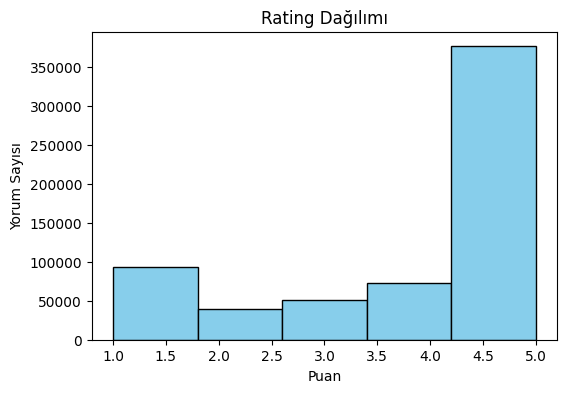

In [45]:
# Rating dağılımını gösterme
plt.figure(figsize=(6,4))
plt.hist(merged_df["rating"], bins=5, color='skyblue', edgecolor='black')
plt.title("Rating Dağılımı")
plt.xlabel("Puan")
plt.ylabel("Yorum Sayısı")
plt.show()


Bu grafik, kullanıcı puanlarının (rating) genel dağılımını gösterir.  
Amaç, hangi puan aralıklarının daha sık verildiğini anlamaktır.  
Bu bilgi, kullanıcı davranışını ve ürün memnuniyetini analiz etmede temel oluşturur.

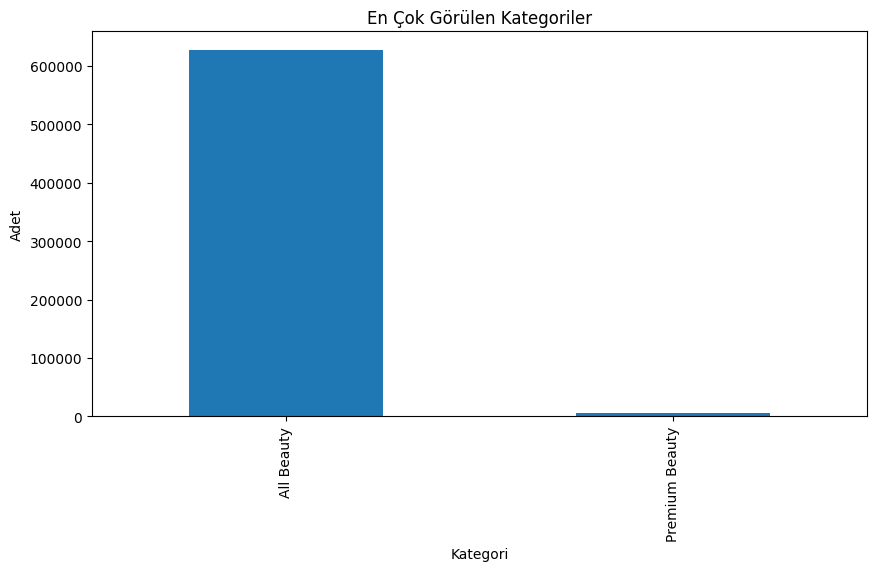

In [46]:
plt.figure(figsize=(10,5))
merged_df['main_category'].value_counts().head(15).plot(kind='bar')
plt.title("En Çok Görülen Kategoriler")
plt.xlabel("Kategori")
plt.ylabel("Adet")
plt.show()


In [47]:
merged_df['asin'].value_counts().head(10)


asin
B07C533XCW    1500
B00R1TAN7I    1362
B08L5KN7X4    1328
B019GBG0IE    1319
B0107QYW14    1105
B012Q9NGE4     856
B07ZJKVVLW     831
B074KD4PX2     777
B005BZQHEC     772
B08B1PR9C7     749
Name: count, dtype: int64

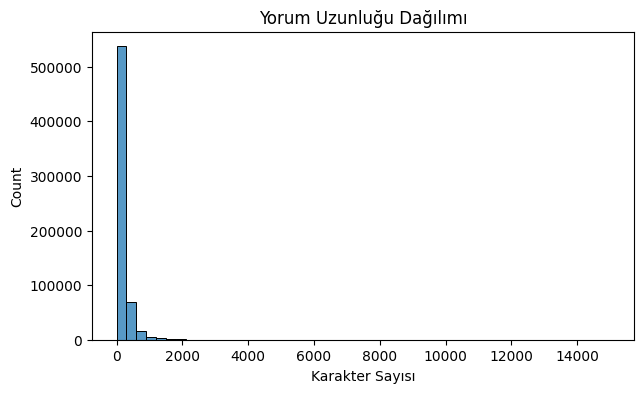

In [48]:
merged_df['text_length'] = merged_df['text'].astype(str).str.len()

plt.figure(figsize=(7,4))
sns.histplot(merged_df['text_length'], bins=50)
plt.title("Yorum Uzunluğu Dağılımı")
plt.xlabel("Karakter Sayısı")
plt.show()


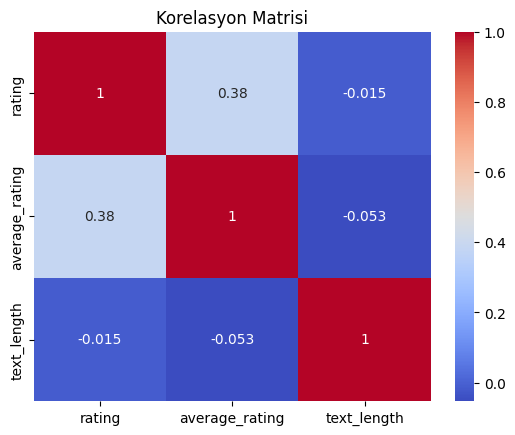

In [49]:
numeric_cols = merged_df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()


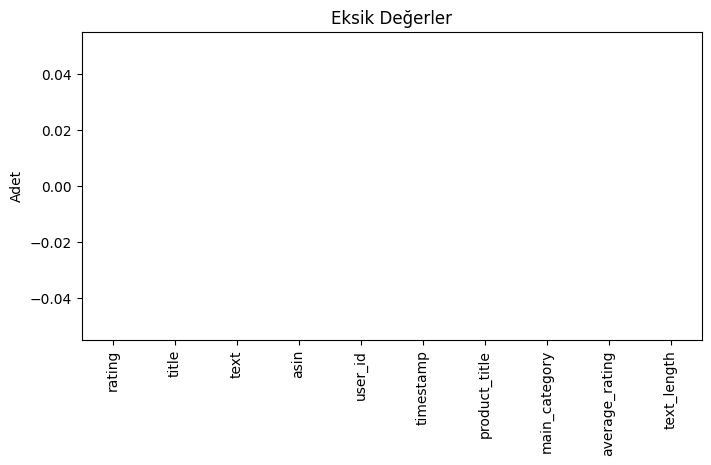

In [50]:
plt.figure(figsize=(8,4))
merged_df.isnull().sum().plot(kind='bar')
plt.title("Eksik Değerler")
plt.ylabel("Adet")
plt.show()


In [51]:
merged_df['user_id'].value_counts().head(10)


user_id
AG73BVBKUOH22USSFJA5ZWL7AKXA      157
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q      141
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1    112
AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2     83
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1     82
AEJU3Z6HDAERETMYI2CXBQVPPDFA       79
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q       77
AHY2TURQPNIDXZGH2CMQLZ343YMQ       66
AEOK4TQIKGO23SJKZ6PW4FETNNDA_1     65
AEAXAJACFMXIAAH4WOHRMXPSZWFA       63
Name: count, dtype: int64

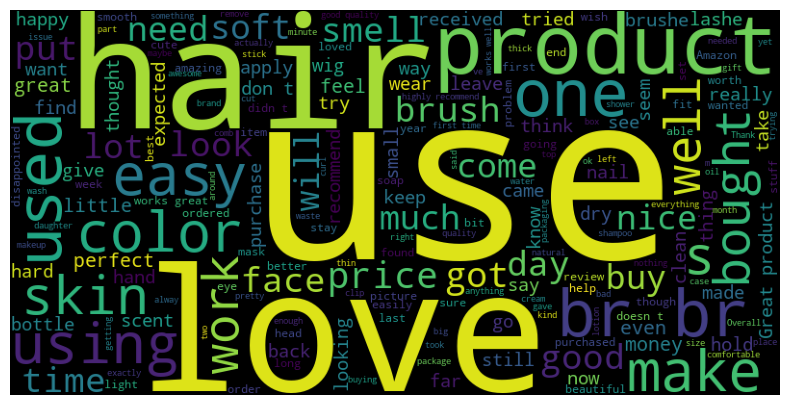

In [52]:
from wordcloud import WordCloud

text_data = " ".join(merged_df['text'].astype(str).tolist())
wc = WordCloud(width=800, height=400).generate(text_data)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


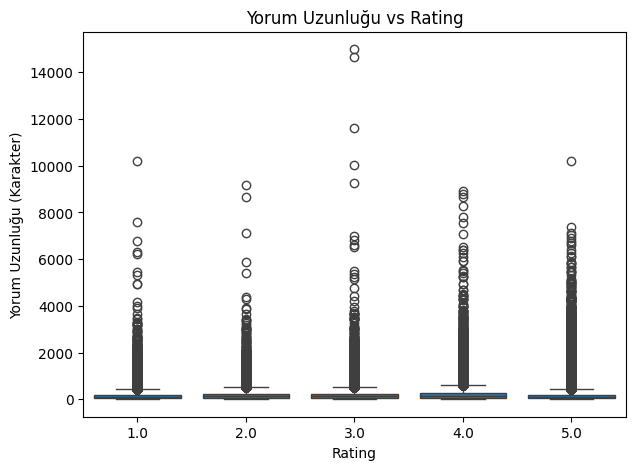

In [53]:
# Yorum uzunluğu
merged_df["text_length"] = merged_df["text"].astype(str).str.len()

plt.figure(figsize=(7,5))
sns.boxplot(x=merged_df["rating"], y=merged_df["text_length"])
plt.title("Yorum Uzunluğu vs Rating")
plt.xlabel("Rating")
plt.ylabel("Yorum Uzunluğu (Karakter)")
plt.show()

In [54]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=3000)
X_train_fs = selector.fit_transform(X_train_tfidf, y_train)
X_test_fs = selector.transform(X_test_tfidf)

print("Feature selection tamam. Yeni shape:", X_train_fs.shape)


Feature selection tamam. Yeni shape: (506954, 3000)


In [55]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200, random_state=42)
X_train_pca = svd.fit_transform(X_train_tfidf)
X_test_pca = svd.transform(X_test_tfidf)

print("PCA tamam. Yeni shape:", X_train_pca.shape)


PCA tamam. Yeni shape: (506954, 200)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

# 1) Rating -> Binary (4-5 pozitif =1, 1-3 negatif =0)
y_train_bin = (y_train >= 4).astype(int)
y_test_bin  = (y_test >= 4).astype(int)

# 2) İki basit base model
models = {
    "LinearSVC": LinearSVC(),
    "SGD_LogReg": SGDClassifier(loss="log_loss", random_state=42, max_iter=1000)
}

# 3) Üç farklı veri aşaması
experiments = [
    ("Before_FS_DR",   X_train_tfidf, X_test_tfidf),
    ("After_FS(Chi2)", X_train_fs,    X_test_fs),
    ("After_DR(SVD)",  X_train_pca,   X_test_pca)
]

results = []

# 4) Eğitim + Değerlendirme
for stage, Xtr, Xte in experiments:
    for name, model in models.items():
        model.fit(Xtr, y_train_bin)
        y_pred = model.predict(Xte)

        results.append({
            "stage": stage,
            "model": name,
            "accuracy":  accuracy_score(y_test_bin, y_pred),
            "precision": precision_score(y_test_bin, y_pred, zero_division=0),
            "recall":    recall_score(y_test_bin, y_pred, zero_division=0),
            "f1":        f1_score(y_test_bin, y_pred, zero_division=0)
        })

results_df = pd.DataFrame(results)
print(results_df)


            stage       model  accuracy  precision    recall        f1
0    Before_FS_DR   LinearSVC  0.881362   0.898930  0.938130  0.918112
1    Before_FS_DR  SGD_LogReg  0.861803   0.862141  0.958297  0.907679
2  After_FS(Chi2)   LinearSVC  0.880605   0.897799  0.938408  0.917654
3  After_FS(Chi2)  SGD_LogReg  0.861306   0.861713  0.958119  0.907362
4   After_DR(SVD)   LinearSVC  0.844413   0.860848  0.931029  0.894564
5   After_DR(SVD)  SGD_LogReg  0.836625   0.842194  0.946989  0.891522


“Deneyler sonucunda LinearSVC modeli tüm aşamalarda en iyi genel performansı göstermiştir. Chi-square feature selection sonrası performans büyük ölçüde korunurken, TruncatedSVD ile boyut indirgeme aşaması bilgi kaybı nedeniyle accuracy ve F1 değerlerini düşürmüştür. SGD_LogReg modeli daha yüksek recall üretse de precision düşüşü nedeniyle LinearSVC’nin gerisinde kalmıştır.”

In [ ]:
results_df.to_csv("outputs/gays_model_results.csv", index=False, encoding="utf-8-sig")
print("CSV kaydedildi: gays_model_results.csv")

CSV kaydedildi: gays_model_results.csv
